In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd

### Load Dataset

In [2]:
# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, 
                       columns=iris.feature_names)
iris_classes = ['setosa', 'versicolor', 'virginica']

iris_features = iris_df.columns.tolist()
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

In [5]:
iris_features = iris_df.columns.tolist()
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Preparation

In [7]:
# split training (75%) and test (25%) dataset

iris_train_df = iris_df.sample(frac = 0.75, random_state = 0)
iris_train_y = iris.target[iris_train_df.index]

iris_test_df = iris_df.drop(iris_train_df.index)
iris_test_y = iris.target[iris_test_df.index]

### Train Model

In [8]:
# Fit the decision tree model to the iris data
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(iris_train_df, iris_train_y)

### Evaluate Model

In [9]:
# Make predictions for a sample iris observation
prediction = dt_classifier.predict(iris_test_df)
accuracy = dt_classifier.score(iris_test_df, iris_test_y)
conf_matrix = confusion_matrix(iris_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.9473684210526315
[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


## Decision Tree Visualization

In [10]:
# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=iris_features)
print(tree_text)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.60
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.60
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- class: 2



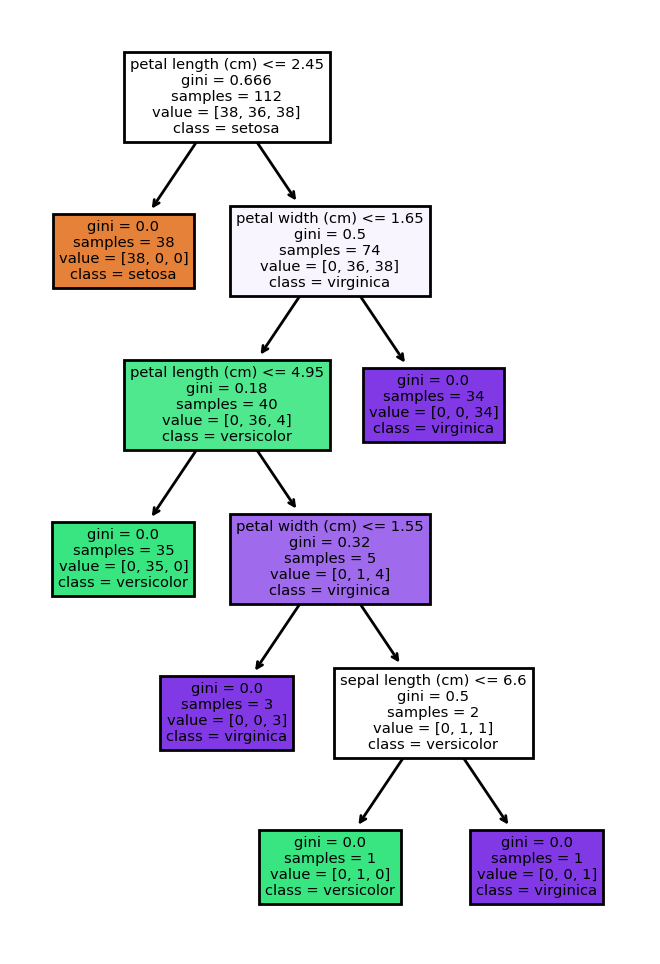

In [11]:
# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=iris_features, class_names=iris_classes, ax=axes)
plt.show()